In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
Zoo=pd.read_csv('Zoo.csv')

In [5]:
Zoo.head()

,animal name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
0,aardvark,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
1,antelope,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
2,bass,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
3,bear,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
4,boar,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1


In [6]:
zoo=Zoo.iloc[:,1:]

In [7]:
zoo.head()

,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
0,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
1,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
2,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
3,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
4,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1


In [8]:
#to split train and test data
from sklearn.model_selection import train_test_split
train,test=train_test_split(zoo,test_size=0.3,random_state=0)

# KNN

In [9]:
from sklearn.neighbors import KNeighborsClassifier as KNC

In [10]:
#to find best k value
acc=[]
for i in range(3,50,2):
    neigh=KNC(n_neighbors=i)
    neigh.fit(train.iloc[:,0:16],train.iloc[:,16])
    train_acc=np.mean(neigh.predict(train.iloc[:,0:16])==train.iloc[:,16])
    test_acc=np.mean(neigh.predict(test.iloc[:,0:16])==test.iloc[:,16])
    acc.append([train_acc,test_acc])
    

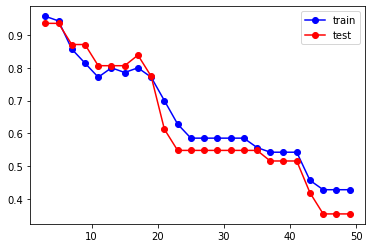

In [11]:
plt.plot(np.arange(3,50,2),[i[0] for i in acc],'bo-')
plt.plot(np.arange(3,50,2),[i[1] for i in acc],'ro-')
plt.legend(['train','test'])

In [13]:
#from plots atk=5 we get best model
#model building at k=5
neigh=KNC(n_neighbors=5)
neigh.fit(train.iloc[:,0:16],train.iloc[:,16])
train_acc=np.mean(neigh.predict(train.iloc[:,0:16])==train.iloc[:,16])
test_acc=np.mean(neigh.predict(test.iloc[:,0:16])==test.iloc[:,16])


In [14]:
train_acc

0.9428571428571428

In [15]:
test_acc

0.9354838709677419